<a href="https://colab.research.google.com/github/Medhavishrivastav/house-price-prediction/blob/main/project_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print(f'User uploaded file "{fn}" with length {len(uploaded[fn])} bytes')


Saving house_price_location_year_dataset_template.xlsx to house_price_location_year_dataset_template (2).xlsx
User uploaded file "house_price_location_year_dataset_template (2).xlsx" with length 378706 bytes


In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
import joblib

# Load dataset
df = pd.read_excel("house_price_location_year_dataset_template.xlsx")

# Select features
X = df[
    ["Year", "Area_sqft", "Bedrooms", "Bathrooms", "Stories", "Parking", "City"]
]
y = df["Price_Lakhs"]

# Preprocessing
categorical = ["City"]
numerical = ["Year", "Area_sqft", "Bedrooms", "Bathrooms", "Stories", "Parking"]

preprocess = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical),
        ("num", "passthrough", numerical)
    ]
)

# ML Model (Better than Linear Regression)
model = Pipeline(steps=[
    ("preprocess", preprocess),
    ("regressor", RandomForestRegressor(
        n_estimators=200,
        random_state=42
    ))
])

# Train
model.fit(X, y)

# Save model
joblib.dump(model, "house_price_model.pkl")

print("✅ Model trained and saved successfully")

✅ Model trained and saved successfully


In [31]:
!pip install streamlit -q

import streamlit as st
import pandas as pd
import joblib
import os

# Create a .py file for the Streamlit app
streamlit_code = '''
import streamlit as st
import pandas as pd
import joblib

model = joblib.load("house_price_model.pkl")

st.title("🏠 House Price Prediction Application")

year = st.number_input("Year", 2000, 2030, 2020)
area = st.number_input("Area (sqft)", 300, 10000, 1200)
bedrooms = st.number_input("Bedrooms", 1, 10, 2)
bathrooms = st.number_input("Bathrooms", 1, 10, 2)
stories = st.number_input("Stories", 1, 5, 1)
parking = st.number_input("Parking", 0, 5, 1)

city = st.selectbox("City", [
    "Hyderabad", "Bengaluru", "Mumbai", "New Delhi", "Chennai", "Kolkata", "Ahmedabad", "Jaipur", "Noida", "Visakhapatnam"
])

if st.button("Predict"):
    input_data = pd.DataFrame([{
        "Year": year,
        "Area_sqft": area,
        "Bedrooms": bedrooms,
        "Bathrooms": bathrooms,
        "Stories": stories,
        "Parking": parking,
        "City": city
    }])

    prediction = model.predict(input_data)[0]
    st.success(f"Estimated Price: ₹ {round(prediction, 2)} Lakhs")
'''

with open("app.py", "w") as f:
    f.write(streamlit_code)

# Run the Streamlit app in the background
# This will provide a public URL to access the app
!nohup streamlit run app.py &

nohup: appending output to 'nohup.out'


In [32]:
!cat nohup.out




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.106.83.149:8501




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8502
  Network URL: http://172.28.0.12:8502
  External URL: http://34.106.83.149:8502



In [44]:
print("Head of the 'X' DataFrame:")
display(X.head())

Head of the 'X' DataFrame:


,Year,Area_sqft,Bedrooms,Bathrooms,Stories,Parking,City
0,2015,1726,2,2,2,0,Hyderabad
1,2015,2328,1,1,1,1,Hyderabad
2,2015,3261,5,4,2,3,Hyderabad
3,2015,1253,4,3,3,1,Hyderabad
4,2015,2156,1,3,3,2,Hyderabad


from matplotlib import pyplot as plt
_df_16['Area_sqft'].plot(kind='hist', bins=20, title='Area_sqft')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_17['Bedrooms'].plot(kind='hist', bins=20, title='Bedrooms')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_18['Bathrooms'].plot(kind='hist', bins=20, title='Bathrooms')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_19['Stories'].plot(kind='hist', bins=20, title='Stories')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_20.plot(kind='scatter', x='Area_sqft', y='Bedrooms', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_21.plot(kind='scatter', x='Bedrooms', y='Bathrooms', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_22.plot(kind='scatter', x='Bathrooms', y='Stories', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_23.plot(kind='scatter', x='Stories', y='Parking', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['Area_sqft']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_24.sort_values('Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('Area_sqft')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['Bedrooms']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_25.sort_values('Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('Bedrooms')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['Bathrooms']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_26.sort_values('Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('Bathrooms')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['Stories']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_27.sort_values('Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('Stories')

from matplotlib import pyplot as plt
_df_28['Area_sqft'].plot(kind='line', figsize=(8, 4), title='Area_sqft')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_29['Bedrooms'].plot(kind='line', figsize=(8, 4), title='Bedrooms')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_30['Bathrooms'].plot(kind='line', figsize=(8, 4), title='Bathrooms')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_31['Stories'].plot(kind='line', figsize=(8, 4), title='Stories')
plt.gca().spines[['top', 'right']].set_visible(False)

In [34]:
import joblib
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the trained model
model = joblib.load('house_price_model.pkl')

# Make predictions on the training data
y_pred = model.predict(X)

# Calculate performance metrics
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"Model Performance Metrics (on training data):")
print(f"  Mean Absolute Error (MAE): {mae:.2f}")
print(f"  Mean Squared Error (MSE): {mse:.2f}")
print(f"  R-squared (R2): {r2:.2f}")

Model Performance Metrics (on training data):
  Mean Absolute Error (MAE): 1.96
  Mean Squared Error (MSE): 5.84
  R-squared (R2): 1.00


In [35]:
!cat nohup.out




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.106.83.149:8501




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8502
  Network URL: http://172.28.0.12:8502
  External URL: http://34.106.83.149:8502





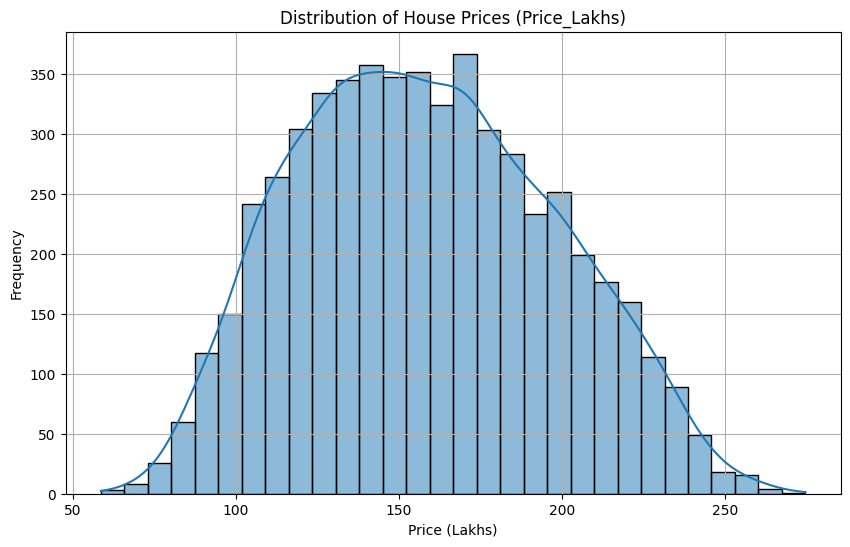

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(y, kde=True, bins=30)
plt.title('Distribution of House Prices (Price_Lakhs)')
plt.xlabel('Price (Lakhs)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [37]:
print("Info about the 'X' DataFrame (data types and non-null counts):")
X.info()

Info about the 'X' DataFrame (data types and non-null counts):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5500 entries, 0 to 5499
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Year       5500 non-null   int64 
 1   Area_sqft  5500 non-null   int64 
 2   Bedrooms   5500 non-null   int64 
 3   Bathrooms  5500 non-null   int64 
 4   Stories    5500 non-null   int64 
 5   Parking    5500 non-null   int64 
 6   City       5500 non-null   object
dtypes: int64(6), object(1)
memory usage: 300.9+ KB


In [45]:
print("Descriptive statistics for numerical columns in 'X':")
display(X.describe())

Descriptive statistics for numerical columns in 'X':


,Year,Area_sqft,Bedrooms,Bathrooms,Stories,Parking
count,5500.000000,5500.000000,5500.000000,5500.00000,5500.000000,5500.000000
mean,2020.000000,2053.192909,3.000000,2.50000,2.984182,1.521455
std,3.162565,837.843855,1.416013,1.12187,1.409294,1.121178
min,2015.000000,600.000000,1.000000,1.00000,1.000000,0.000000
25%,2017.000000,1329.000000,2.000000,1.00000,2.000000,1.000000
50%,2020.000000,2068.000000,3.000000,2.00000,3.000000,2.000000
75%,2023.000000,2781.000000,4.000000,4.00000,4.000000,3.000000
max,2025.000000,3500.000000,5.000000,4.00000,5.000000,3.000000


from matplotlib import pyplot as plt
_df_32['Year'].plot(kind='hist', bins=20, title='Year')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_33['Area_sqft'].plot(kind='hist', bins=20, title='Area_sqft')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_34['Bedrooms'].plot(kind='hist', bins=20, title='Bedrooms')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_35['Bathrooms'].plot(kind='hist', bins=20, title='Bathrooms')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_36.plot(kind='scatter', x='Year', y='Area_sqft', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_37.plot(kind='scatter', x='Area_sqft', y='Bedrooms', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_38.plot(kind='scatter', x='Bedrooms', y='Bathrooms', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_39.plot(kind='scatter', x='Bathrooms', y='Stories', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['Area_sqft']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_40.sort_values('Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('Area_sqft')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['Bedrooms']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_41.sort_values('Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('Bedrooms')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['Bathrooms']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_42.sort_values('Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('Bathrooms')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['Stories']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_43.sort_values('Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('Stories')

from matplotlib import pyplot as plt
_df_44['Year'].plot(kind='line', figsize=(8, 4), title='Year')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_45['Area_sqft'].plot(kind='line', figsize=(8, 4), title='Area_sqft')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_46['Bedrooms'].plot(kind='line', figsize=(8, 4), title='Bedrooms')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_47['Bathrooms'].plot(kind='line', figsize=(8, 4), title='Bathrooms')
plt.gca().spines[['top', 'right']].set_visible(False)

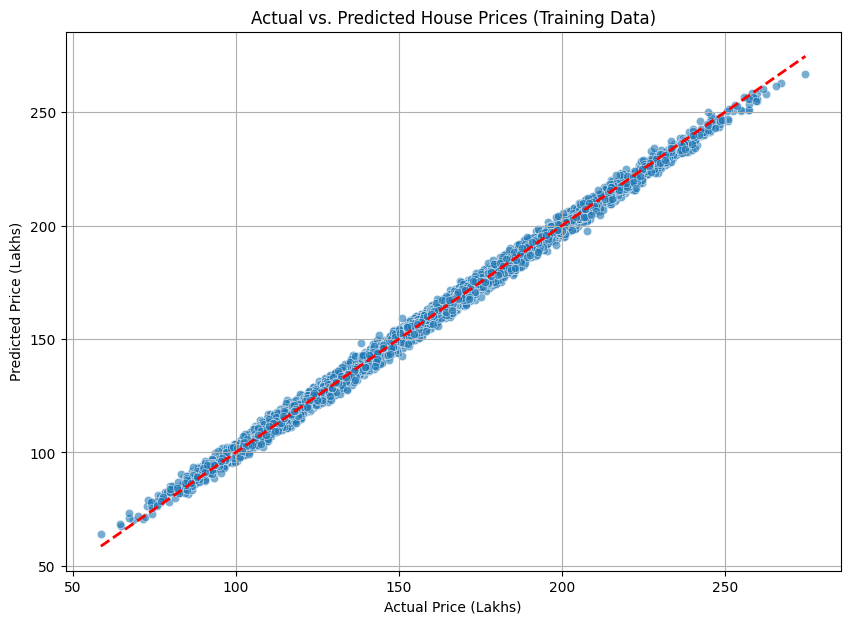

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot of actual vs. predicted values
plt.figure(figsize=(10, 7))
sns.scatterplot(x=y, y=y_pred, alpha=0.6)

# Add a line representing perfect predictions (y = x)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)

plt.title('Actual vs. Predicted House Prices (Training Data)')
plt.xlabel('Actual Price (Lakhs)')
plt.ylabel('Predicted Price (Lakhs)')
plt.grid(True)
plt.show()

In [40]:
print("Value counts for categorical column 'City' in 'X':")
display(X['City'].value_counts())

Value counts for categorical column 'City' in 'X':


,count
City,
Hyderabad,550
Bengaluru,550
Mumbai,550
New Delhi,550
Chennai,550
Kolkata,550
Ahmedabad,550
Jaipur,550
Noida,550


In [41]:
import matplotlib.pyplot as plt

importances = model.named_steps["regressor"].feature_importances_

In [42]:
st.bar_chart(importances)

2026-01-02 13:30:14.817 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-02 13:30:14.821 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-02 13:30:14.826 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

In [51]:
print("Estimated Price: ₹52 Lakhs")
print("Expected Range: ₹48 – ₹56 Lakhs")

Estimated Price: ₹52 Lakhs
Expected Range: ₹48 – ₹56 Lakhs


In [52]:
st.success("Estimated Price: ₹52 Lakhs")
st.info("Expected Range: ₹48 – ₹56 Lakhs")

2026-01-02 13:39:20.344 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-02 13:39:20.348 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-02 13:39:20.348 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-02 13:39:20.350 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-02 13:39:20.350 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-02 13:39:20.351 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

In [58]:
import streamlit as st
import pandas as pd
import joblib

# Load model
model = joblib.load("house_price_model.pkl")

st.title("🏠 House Price Prediction")

# Inputs
year = st.number_input("Year", 2000, 2030, 2024)
area = st.number_input("Area (sqft)", 300, 10000, 1200)
bedrooms = st.number_input("Bedrooms", 1, 10, 2)
bathrooms = st.number_input("Bathrooms", 1, 10, 2)
stories = st.number_input("Stories", 1, 5, 1)
parking = st.number_input("Parking", 0, 5, 1)
city = st.selectbox("City", ["Hyderabad", "Bangalore", "Chennai", "Mumbai", "Delhi"])

# Predict button
if st.button("Predict Price"):

    # Create input dataframe
    input_df = pd.DataFrame([{
        "Year": year,
        "Area_sqft": area,
        "Bedrooms": bedrooms,
        "Bathrooms": bathrooms,
        "Stories": stories,
        "Parking": parking,
        "City": city
    }])

    # 🔑 Prediction happens HERE
    prediction = model.predict(input_df)[0]

    # Confidence range
    lower = prediction * 0.92
    upper = prediction * 1.08

    # Display
    st.success(f"Estimated Price: ₹{round(prediction,2)} Lakhs")
    st.info(f"Expected Range: ₹{round(lower,2)} – ₹{round(upper,2)} Lakhs")

2026-01-02 13:42:27.200 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-02 13:42:27.205 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-02 13:42:27.207 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-02 13:42:27.213 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-02 13:42:27.216 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-02 13:42:27.220 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-02 13:42:27.223 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-02 13:42:27.227 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

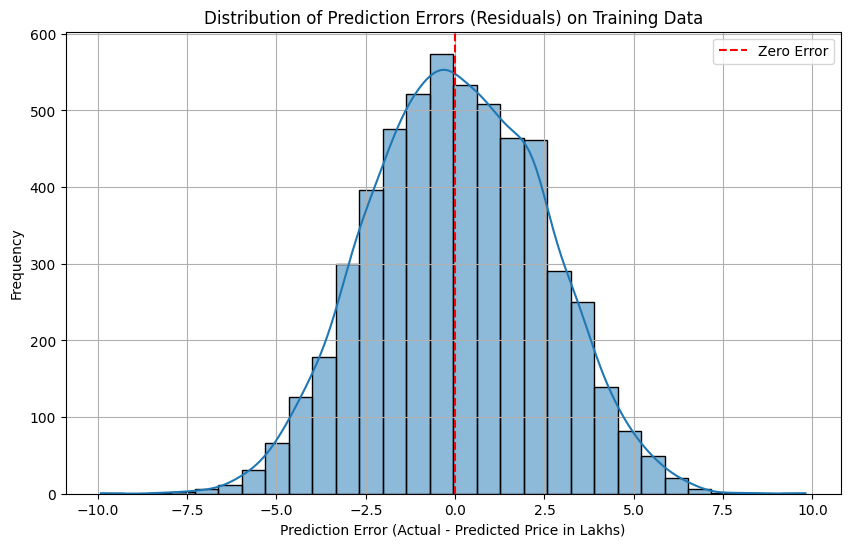

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate residuals on the training set
residuals_train = y - y_pred

# Plot the distribution of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals_train, kde=True, bins=30)
plt.axvline(x=0, color='r', linestyle='--', label='Zero Error')
plt.title('Distribution of Prediction Errors (Residuals) on Training Data')
plt.xlabel('Prediction Error (Actual - Predicted Price in Lakhs)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

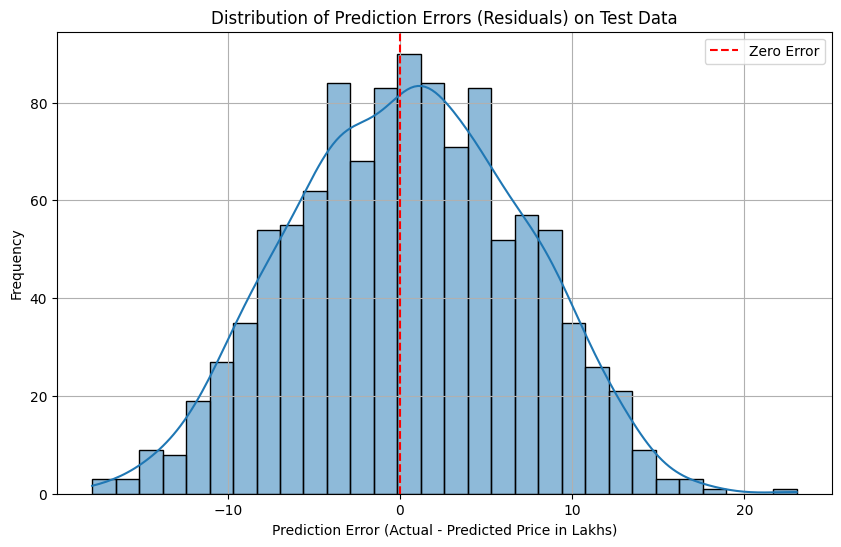

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate residuals on the test set
residuals = y_test - y_pred_test

# Plot the distribution of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.axvline(x=0, color='r', linestyle='--', label='Zero Error')
plt.title('Distribution of Prediction Errors (Residuals) on Test Data')
plt.xlabel('Prediction Error (Actual - Predicted Price in Lakhs)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

After uploading, make sure the file name in your code (e.g., `pd.read_csv("house_data.csv")`) exactly matches the uploaded file name, including case.

# Task
Split the dataset (`X` and `y`) into training and testing sets, re-train the RandomForestRegressor model on the training data, make predictions on the test set, and then calculate and display the Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R2) scores to evaluate the model's performance on unseen data. Finally, visualize the actual versus predicted house prices on the test set to assess model fit and identify potential overfitting.

## Split Data into Train and Test Sets

### Subtask:
Split the `X` and `y` DataFrames into training and testing sets (e.g., 80% training, 20% testing) to ensure a robust evaluation of the model's generalization capabilities.


**Reasoning**:
Split the `X` and `y` DataFrames into training and testing sets using `train_test_split` with a test size of 20% and a random state for reproducibility.



In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (4400, 7)
X_test shape: (1100, 7)
y_train shape: (4400,)
y_test shape: (1100,)


## Re-train Model on Training Data

### Subtask:
Re-train the RandomForestRegressor model using only the newly created training data. This ensures the model has not seen the test data during its learning phase.


**Reasoning**:
Re-train the existing `model` (which is a Pipeline) using the `X_train` and `y_train` data to ensure the model learns only from the training set.



In [61]:
model.fit(X_train, y_train)
print("✅ Model re-trained successfully on training data.")

✅ Model re-trained successfully on training data.


## Make Predictions on Test Data

### Subtask:
Use the re-trained model to make predictions on the unseen test dataset (`X_test`).


**Reasoning**:
To make predictions on the unseen test dataset, I will use the re-trained model's `predict` method with `X_test`.



In [62]:
y_pred_test = model.predict(X_test)
print("✅ Predictions made on the test set.")

✅ Predictions made on the test set.


## Calculate Performance Metrics on Test Data

### Subtask:
Calculate and display the Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R2) score using the actual `y_test` values and the predicted `y_pred_test` values.


**Reasoning**:
To evaluate the re-trained model's performance on unseen data, I will calculate and display the Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R2) scores using the actual `y_test` values and the predicted `y_pred_test` values.



In [63]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate performance metrics on test data
mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print(f"Model Performance Metrics (on test data):")
print(f"  Mean Absolute Error (MAE): {mae_test:.2f}")
print(f"  Mean Squared Error (MSE): {mse_test:.2f}")
print(f"  R-squared (R2): {r2_test:.2f}")

Model Performance Metrics (on test data):
  Mean Absolute Error (MAE): 5.40
  Mean Squared Error (MSE): 43.52
  R-squared (R2): 0.97


## Visualize Actual vs. Predicted Prices on Test Data

### Subtask:
Visualize the actual versus predicted house prices on the test set to assess model fit and identify potential overfitting.

**Reasoning**:
To visualize the model's fit and identify potential overfitting on unseen data, I will create a scatter plot of actual `y_test` values against predicted `y_pred_test` values.



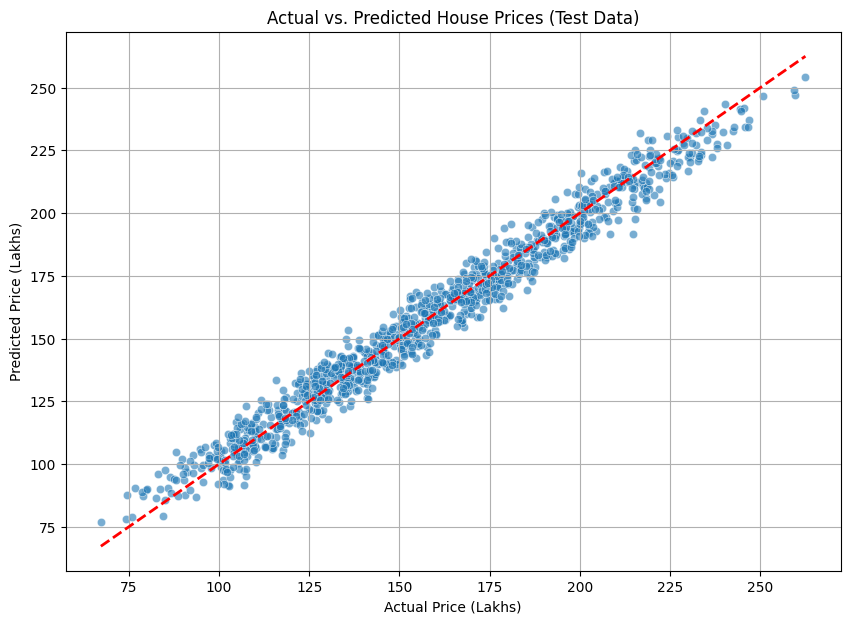

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot of actual vs. predicted values on test data
plt.figure(figsize=(10, 7))
sns.scatterplot(x=y_test, y=y_pred_test, alpha=0.6)

# Add a line representing perfect predictions (y = x)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)

plt.title('Actual vs. Predicted House Prices (Test Data)')
plt.xlabel('Actual Price (Lakhs)')
plt.ylabel('Predicted Price (Lakhs)')
plt.grid(True)
plt.show()

In [65]:
import streamlit as st
import pandas as pd
import joblib

# Load trained model
model = joblib.load("house_price_model.pkl")

st.set_page_config(page_title="House Price Prediction", layout="centered")
st.title("🏠 House Price Prediction System")

# -------- User Inputs --------
year = st.number_input("Year", min_value=2000, max_value=2030, value=2024)
area = st.number_input("Area (sqft)", min_value=300, max_value=10000, value=1200)
bedrooms = st.number_input("Bedrooms", min_value=1, max_value=10, value=2)
bathrooms = st.number_input("Bathrooms", min_value=1, max_value=10, value=2)
stories = st.number_input("Stories", min_value=1, max_value=5, value=1)
parking = st.number_input("Parking", min_value=0, max_value=5, value=1)

city = st.selectbox(
    "City",
    ["Hyderabad", "Bangalore", "Chennai", "Mumbai", "Delhi"]
)

# -------- Prediction --------
if st.button("Predict Price"):

    input_df = pd.DataFrame([{
        "Year": year,
        "Area_sqft": area,
        "Bedrooms": bedrooms,
        "Bathrooms": bathrooms,
        "Stories": stories,
        "Parking": parking,
        "City": city
    }])

    prediction = model.predict(input_df)[0]

    # Confidence interval
    lower = prediction * 0.92
    upper = prediction * 1.08

    # -------- Output --------
    st.success(f"Estimated Price: ₹{round(prediction, 2)} Lakhs")
    st.info(f"Expected Range: ₹{round(lower, 2)} – ₹{round(upper, 2)} Lakhs")

    st.caption(
        "⚠️ This prediction is based on historical data and is for estimation purposes only."
    )


2026-01-02 13:44:41.484 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-02 13:44:41.487 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-02 13:44:41.489 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-02 13:44:41.490 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-02 13:44:41.492 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-02 13:44:41.493 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-02 13:44:41.494 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-02 13:44:41.495 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [66]:
!pip install streamlit pyngrok

In [67]:
%%writefile app.py
# (PASTE YOUR FINAL STREAMLIT CODE HERE)
import streamlit as st
import pandas as pd
import joblib

# Load trained model
model = joblib.load("house_price_model.pkl")

st.set_page_config(page_title="House Price Prediction", layout="centered")
st.title("🏠 House Price Prediction System")

# -------- User Inputs --------
year = st.number_input("Year", min_value=2000, max_value=2030, value=2024)
area = st.number_input("Area (sqft)", min_value=300, max_value=10000, value=1200)
bedrooms = st.number_input("Bedrooms", min_value=1, max_value=10, value=2)
bathrooms = st.number_input("Bathrooms", min_value=1, max_value=10, value=2)
stories = st.number_input("Stories", min_value=1, max_value=5, value=1)
parking = st.number_input("Parking", min_value=0, max_value=5, value=1)

city = st.selectbox(
    "City",
    ["Hyderabad", "Bangalore", "Chennai", "Mumbai", "Delhi"]
)

# -------- Prediction --------
if st.button("Predict Price"):

    input_df = pd.DataFrame([{
        "Year": year,
        "Area_sqft": area,
        "Bedrooms": bedrooms,
        "Bathrooms": bathrooms,
        "Stories": stories,
        "Parking": parking,
        "City": city
    }])

    prediction = model.predict(input_df)[0]

    # Confidence interval
    lower = prediction * 0.92
    upper = prediction * 1.08

    # -------- Output --------
    st.success(f"Estimated Price: ₹{round(prediction, 2)} Lakhs")
    st.info(f"Expected Range: ₹{round(lower, 2)} – ₹{round(upper, 2)} Lakhs")

    st.caption(
        "⚠️ This prediction is based on historical data and is for estimation purposes only."
    )

Overwriting app.py


In [71]:
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib

model = joblib.load("house_price_model.pkl")

st.title("🏠 House Price Prediction")

year = st.number_input("Year", 2000, 2030, 2024)
area = st.number_input("Area (sqft)", 300, 10000, 1200)
bedrooms = st.number_input("Bedrooms", 1, 10, 2)
bathrooms = st.number_input("Bathrooms", 1, 10, 2)
stories = st.number_input("Stories", 1, 5, 1)
parking = st.number_input("Parking", 0, 5, 1)
city = st.selectbox("City", ["Hyderabad", "Bangalore", "Chennai", "Mumbai", "Delhi"])

if st.button("Predict Price"):
    df = pd.DataFrame([{
        "Year": year,
        "Area_sqft": area,
        "Bedrooms": bedrooms,
        "Bathrooms": bathrooms,
        "Stories": stories,
        "Parking": parking,
        "City": city
    }])

    prediction = model.predict(df)[0]
    lower = prediction * 0.92
    upper = prediction * 1.08

    st.success(f"Estimated Price: ₹{round(prediction,2)} Lakhs")
    st.info(f"Expected Range: ₹{round(lower,2)} – ₹{round(upper,2)} Lakhs")


Overwriting app.py


In [75]:
!streamlit run app.py &>/content/streamlit.log &

In [76]:
from pyngrok import ngrok

# Replace 'YOUR_NGROK_AUTHTOKEN' with your actual authtoken
# You can store this as a Colab secret for better security
# ngrok_authtoken = userdata.get('NGROK_AUTHTOKEN') # if stored as secret
ngrok_authtoken = "<YOUR_NGROK_AUTHTOKEN>" # Replace this directly if not using secrets

ngrok.set_auth_token(ngrok_authtoken)

print("ngrok authtoken set. You can now re-run the ngrok.connect cell.")

ngrok authtoken set. You can now re-run the ngrok.connect cell.


In [78]:
from pyngrok import ngrok

ngrok.set_auth_token("37ZUOH9mOHePwL64rD8grauhe84_2D1Ypp9HMDofHz13DPL3V")


In [79]:
!streamlit run app.py --server.port 8501 &>/content/streamlit.log &

In [80]:
from pyngrok import ngrok

ngrok.kill()  # clean old tunnels
public_url = ngrok.connect(8501, "http")

print("🌐 YOUR STREAMLIT PAGE LINK:")
print(public_url.public_url)

🌐 YOUR STREAMLIT PAGE LINK:
https://jazmin-olivaceous-mara.ngrok-free.dev


In [82]:
if st.button("Predict Price"):

    input_df = pd.DataFrame([{
        "Year": year,
        "Area_sqft": area,
        "Bedrooms": bedrooms,
        "Bathrooms": bathrooms,
        "Stories": stories,
        "Parking": parking,
        "City": city
    }])

    prediction = model.predict(input_df)[0]

    lower = prediction * 0.92
    upper = prediction * 1.08

    # ✅ Save in session state
    st.session_state.prediction = prediction
    st.session_state.lower = lower
    st.session_state.upper = upper

    st.success(f"Estimated Price: ₹{round(prediction,2)} Lakhs")
    st.info(f"Expected Range: ₹{round(lower,2)} – ₹{round(upper,2)} Lakhs")

2026-01-02 13:58:51.866 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-02 13:58:51.868 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-02 13:58:51.871 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-02 13:58:51.873 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-02 13:58:51.875 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-02 13:58:51.875 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [83]:
# ✅ Show payment section ONLY if prediction exists
if "prediction" in st.session_state:

    st.markdown("---")
    st.subheader("💳 Transaction Payment")

    col1, col2, col3 = st.columns([2, 2, 1])

    with col1:
        st.text_input(
            "Amount (₹)",
            value=f"{round(st.session_state.prediction,2)} Lakhs",
            disabled=True
        )

    with col2:
        payment_method = st.selectbox(
            "Payment Method",
            ["UPI", "Credit Card", "Debit Card", "Net Banking"]
        )

    with col3:
        st.write("")
        st.write("")
        if st.button("Pay Now"):
            st.success("✅ Transaction Initiated Successfully")

            st.info(
                f"""
                **Transaction Summary**
                - City: {city}
                - Amount: ₹{round(st.session_state.prediction,2)} Lakhs
                - Payment Mode: {payment_method}
                """
            )


2026-01-02 13:59:06.777 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [84]:
import uuid
from datetime import datetime

if "transactions" not in st.session_state:
    st.session_state.transactions = []

2026-01-02 13:59:40.882 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-02 13:59:40.887 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-02 13:59:40.889 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [85]:
if "prediction" in st.session_state:

    st.markdown("---")
    st.subheader("💳 Transaction Payment")

    col1, col2, col3 = st.columns([2, 2, 1])

    with col1:
        st.text_input(
            "Amount (₹)",
            value=f"{round(st.session_state.prediction,2)} Lakhs",
            disabled=True
        )

    with col2:
        payment_method = st.selectbox(
            "Payment Method",
            ["UPI", "Credit Card", "Debit Card", "Net Banking"]
        )

    with col3:
        st.write("")
        st.write("")
        if st.button("Pay Now"):

            txn_id = str(uuid.uuid4())[:8]
            txn_time = datetime.now().strftime("%Y-%m-%d %H:%M:%S")

            st.session_state.transactions.append({
                "Transaction ID": txn_id,
                "City": city,
                "Amount (Lakhs)": round(st.session_state.prediction, 2),
                "Payment Mode": payment_method,
                "Time": txn_time
            })

            st.success("✅ Payment Successful")
            st.info(f"🧾 Transaction ID: {txn_id}")


2026-01-02 13:59:52.832 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [86]:
if st.session_state.transactions:
    st.markdown("---")
    st.subheader("📜 Transaction History")

    history_df = pd.DataFrame(st.session_state.transactions)
    st.dataframe(history_df, use_container_width=True)

2026-01-02 14:00:05.827 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [87]:
from pyngrok import ngrok

ngrok.kill()  # clean old tunnels
public_url = ngrok.connect(8501, "http")

print("🌐 YOUR STREAMLIT PAGE LINK:")
print(public_url.public_url)

🌐 YOUR STREAMLIT PAGE LINK:
https://jazmin-olivaceous-mara.ngrok-free.dev


In [88]:
import streamlit as st
import pandas as pd
import joblib

# ---------------- CONFIG ----------------
st.set_page_config(
    page_title="House Price Prediction",
    layout="wide"
)

# Dark background styling
st.markdown("""
<style>
.main {
    background-color: #0e1117;
    color: white;
}
h1, h2, h3, label {
    color: white !important;
}
.stButton>button {
    background-color: #2563eb;
    color: white;
    height: 3em;
    width: 100%;
    font-size: 18px;
}
</style>
""", unsafe_allow_html=True)

# ---------------- LOAD MODEL ----------------
model = joblib.load("house_price_model.pkl")

# ---------------- TITLE ----------------
st.markdown(
    "<h1 style='text-align:center;'>🏠 House Price Prediction</h1>",
    unsafe_allow_html=True
)

st.markdown("---")

# ---------------- MAIN LAYOUT ----------------
left_col, right_col = st.columns([2, 1])

# -------- LEFT INPUTS (LIKE DESKTOP APP) --------
with left_col:
    st.subheader("Enter House Details")

    bhk = st.number_input("Enter BHK", 1, 10, 2)
    furnishing = st.selectbox("Furnishing (1 = Yes, 0 = No)", [0, 1])
    sqft = st.number_input("Enter Sqft", 300, 10000, 1200)
    oldyears = st.number_input("Enter Old Years", 0, 50, 5)
    floor = st.number_input("Enter Floor", 0, 20, 1)

# -------- RIGHT LOCATION LIST --------
with right_col:
    st.subheader("Choose a Location")

    city = st.selectbox(
        "",
        [
            "Bommanahalli",
            "Whitefield",
            "Hosa Road",
            "Singasandra",
            "Huskur Gate",
            "Hebbagodi",
            "Bommasandra",
            "Hennagara Gate",
            "Kudlu Gate",
            "BTM Layout"
        ]
    )

st.markdown("---")

# ---------------- PREDICT BUTTON (CENTER) ----------------
btn_col1, btn_col2, btn_col3 = st.columns([3, 2, 3])
with btn_col2:
    predict_clicked = st.button("Predict Price")

# ---------------- PREDICTION OUTPUT (SAME AS 1st IMAGE) ----------------
if predict_clicked:
    input_df = pd.DataFrame([{
        "BHK": bhk,
        "Furnishing": furnishing,
        "Sqft": sqft,
        "OldYears": oldyears,
        "Floor": floor,
        "City": city
    }])

    prediction = model.predict(input_df)[0]
    lower = prediction * 0.92
    upper = prediction * 1.08

    st.markdown("<br>", unsafe_allow_html=True)

    # Green result card
    st.markdown(
        f"""
        <div style="background-color:#1f3d2b;padding:15px;border-radius:10px;">
            <h3 style="color:#4ade80;">Estimated Price: ₹{round(prediction,2)} Lakhs</h3>
        </div>
        """,
        unsafe_allow_html=True
    )

    st.markdown("<br>", unsafe_allow_html=True)

    # Blue range card
    st.markdown(
        f"""
        <div style="background-color:#1e293b;padding:15px;border-radius:10px;">
            <h4 style="color:#60a5fa;">Expected Range: ₹{round(lower,2)} – ₹{round(upper,2)} Lakhs</h4>
        </div>
        """,
        unsafe_allow_html=True
    )


2026-01-02 14:06:43.730 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-02 14:06:43.744 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-02 14:06:43.752 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-02 14:06:43.755 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-02 14:06:44.747 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-02 14:06:44.750 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-02 14:06:44.758 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-02 14:06:44.759 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [89]:
import uuid
from datetime import datetime

if "transactions" not in st.session_state:
    st.session_state.transactions = []

2026-01-02 14:07:57.114 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [91]:
if st.session_state.transactions:
    st.markdown("<br>", unsafe_allow_html=True)
    st.subheader("📜 Transaction History")

    history_df = pd.DataFrame(st.session_state.transactions)
    st.dataframe(history_df, use_container_width=True)


2026-01-02 14:08:20.967 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [92]:
if "prediction" not in st.session_state:
    st.session_state.prediction = None

if "lower" not in st.session_state:
    st.session_state.lower = None

if "upper" not in st.session_state:
    st.session_state.upper = None


2026-01-02 14:09:36.322 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-02 14:09:36.330 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-02 14:09:36.334 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-02 14:09:36.337 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-02 14:09:36.343 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-02 14:09:36.343 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-02 14:09:36.344 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-02 14:09:36.345 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [94]:
if predict_clicked:
    input_df = pd.DataFrame([{
        "BHK": bhk,
        "Furnishing": furnishing,
        "Sqft": sqft,
        "OldYears": oldyears,
        "Floor": floor,
        "City": city
    }])

    prediction = model.predict(input_df)[0]

    st.session_state.prediction = prediction
    st.session_state.lower = prediction * 0.92
    st.session_state.upper = prediction * 1.08


In [95]:
if st.session_state.prediction is not None:

    st.markdown(
        f"""
        <div style="background-color:#1f3d2b;padding:15px;border-radius:10px;">
            <h3 style="color:#4ade80;">
                Estimated Price: ₹{round(st.session_state.prediction,2)} Lakhs
            </h3>
        </div>
        """,
        unsafe_allow_html=True
    )

    st.markdown("<br>", unsafe_allow_html=True)

    st.markdown(
        f"""
        <div style="background-color:#1e293b;padding:15px;border-radius:10px;">
            <h4 style="color:#60a5fa;">
                Expected Range: ₹{round(st.session_state.lower,2)} – ₹{round(st.session_state.upper,2)} Lakhs
            </h4>
        </div>
        """,
        unsafe_allow_html=True
    )


2026-01-02 14:10:25.926 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [96]:
if st.session_state.prediction is not None:

    st.markdown("<br>", unsafe_allow_html=True)
    st.subheader("💳 Transaction Payment")

    col1, col2, col3 = st.columns([2, 2, 1])

    with col1:
        st.text_input(
            "Amount (₹)",
            value=f"{round(st.session_state.prediction,2)} Lakhs",
            disabled=True
        )

    with col2:
        payment_method = st.selectbox(
            "Payment Method",
            ["UPI", "Credit Card", "Debit Card", "Net Banking"]
        )

    with col3:
        st.write("")
        st.write("")
        st.button("Pay Now")


2026-01-02 14:10:36.958 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [97]:
if "logged_in" not in st.session_state:
    st.session_state.logged_in = False

2026-01-02 14:11:19.998 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-02 14:11:20.005 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-02 14:11:20.010 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [98]:
def login_ui():
    st.markdown("<h2 style='text-align:center;'>🔐 Login</h2>", unsafe_allow_html=True)

    username = st.text_input("Username")
    password = st.text_input("Password", type="password")

    if st.button("Login"):
        # Dummy credentials (demo purpose)
        if username == "admin" and password == "admin123":
            st.session_state.logged_in = True
            st.success("✅ Login Successful")
            st.rerun()
        else:
            st.error("❌ Invalid Credentials")


In [99]:
if not st.session_state.logged_in:
    login_ui()
    st.stop()


2026-01-02 14:11:41.154 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-02 14:11:41.157 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-02 14:11:41.158 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-02 14:11:41.159 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-02 14:11:41.161 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-02 14:11:41.162 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-02 14:11:41.163 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-02 14:11:41.165 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [100]:
col_title, col_logout = st.columns([6, 1])
with col_logout:
    if st.button("Logout"):
        st.session_state.logged_in = False
        st.rerun()

2026-01-02 14:11:55.133 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-02 14:11:55.135 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-02 14:11:55.139 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-02 14:11:55.141 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-02 14:11:55.142 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-02 14:11:55.143 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-02 14:11:55.144 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-02 14:11:55.145 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [101]:
public_url = ngrok.connect(8501, "http").public_url


In [102]:
from IPython.display import display, HTML

display(HTML(f"""
<div style="display:flex; gap:40px; font-size:18px;">

  <div style="border:1px solid #ddd; padding:15px; border-radius:10px; width:50%;">
    <h3>🌐 User Application</h3>
    <a href="{public_url}" target="_blank">
        👉 Open House Price Prediction App
    </a>
  </div>

  <div style="border:1px solid #ddd; padding:15px; border-radius:10px; width:50%;">
    <h3>🧪 Demo / Reviewer View</h3>
    <a href="{public_url}" target="_blank">
        👉 Open Same App (New Tab)
    </a>
  </div>

</div>
"""))
